# EDA Velocidad del viento

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter


***Nota:*** *En caso de visualizar el mensaje 'ModuleNotFoundError', ignorarlo.*

### Datos: Velocidad del viento

El pronostico de la velocidad del viento es fundamental, sobre todo por sus implicaciones en: seguridad en la aviación y la navegación, generación de energía eólica, agricultura, construcción, meteorología, recreación y deporte. Los datos suministrados, reportan diferentes mediciones que pueden explicar y permitir realizar la predicción de la velocidad del viento. Suponga que las mediciones presentadas, son obtenidas cada 24 hrs (ver Wind Speed). Además, suponga que desea pronosticar, cual será la la velocidad del viento, durante las próximas 24 hrs, fuera de la muestra. El objetivo principal es, identificar que cantidad de energía eólica se puede generar durante este tiempo (24 hrs), para posteriormente, poder comercializarla a empresas que producen por ejemplo hidrógeno verde.

A continuación se realizará el análisis exploratorio para los datos del dataset Velocidad del viento.

In [10]:
# lectura de datos
viento_df = pd.read_csv('C:/Users/kaes1/Downloads/data_treino_dv_df_2000_2010.csv')
viento_df.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [11]:
# Nombres de columnas
viento_df.columns

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')

Por dificultad de compresión de los nombres, y por ser muy largos, para mejorar el análisis se realizará el cambio de nombres para los campos del dataset.

### Renombrar Variables

In [12]:
# Renombrar variables
nuevos_nombres = {'HORA (UTC)': 'HORA (UTC)', 
                  'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'DirVientoHoraria',
                  'VENTO, VELOCIDADE HORARIA (m/s)': 'VelHorariaViento',
                  'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'HumRelMaxHAnt',
                  'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'HumRelMinHAnt',
                  'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'TempMaxHAnt',
                  'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'TempMinHAnt',
                  'UMIDADE RELATIVA DO AR, HORARIA (%)': 'HumRelHoraria',
                  'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'PresionAtmNivEstHor',
                  'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'PreciTotalHr',
                  'VENTO, RAJADA MAXIMA (m/s)': 'MaxRafagaViento',
                  'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'PreAtmMaxHAnt',
                  'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'PreAtmMinHAnt'}
viento_df.rename(columns=nuevos_nombres, inplace=True)
viento_df.columns


Index(['HORA (UTC)', 'DirVientoHoraria', 'VelHorariaViento', 'HumRelMaxHAnt',
       'HumRelMinHAnt', 'TempMaxHAnt', 'TempMinHAnt', 'HumRelHoraria',
       'PresionAtmNivEstHor', 'PreciTotalHr', 'MaxRafagaViento',
       'PreAtmMaxHAnt', 'PreAtmMinHAnt'],
      dtype='object')

Los nuevos nombres de las variables son abreviaturas que facilitarán el análisis de los datos. Nuestra variable dependiente es **VelHorariaViento**.

In [13]:
# Tipos de variables
viento_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HORA (UTC)           87693 non-null  object 
 1   DirVientoHoraria     87693 non-null  float64
 2   VelHorariaViento     87693 non-null  float64
 3   HumRelMaxHAnt        87693 non-null  float64
 4   HumRelMinHAnt        87693 non-null  float64
 5   TempMaxHAnt          87693 non-null  float64
 6   TempMinHAnt          87693 non-null  float64
 7   HumRelHoraria        87693 non-null  float64
 8   PresionAtmNivEstHor  87693 non-null  float64
 9   PreciTotalHr         87693 non-null  float64
 10  MaxRafagaViento      87693 non-null  float64
 11  PreAtmMaxHAnt        87693 non-null  float64
 12  PreAtmMinHAnt        87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


In [14]:
# Tipos de variables
cat_cols=viento_df.select_dtypes(include=['object']).columns
num_cols = viento_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['HORA (UTC)'], dtype='object')
Numerical Variables:
['DirVientoHoraria', 'VelHorariaViento', 'HumRelMaxHAnt', 'HumRelMinHAnt', 'TempMaxHAnt', 'TempMinHAnt', 'HumRelHoraria', 'PresionAtmNivEstHor', 'PreciTotalHr', 'MaxRafagaViento', 'PreAtmMaxHAnt', 'PreAtmMinHAnt']


Todos los campos del dataset son númericos, a excepción del campo "HORA (UTC)" que es de tipo objeto. Al aprecer no se tienen datos faltantes, pero esto se comprobará posteriormente.

### Decripción númerica de los datos

In [15]:
# Descripción númerica de los datos
viento_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DirVientoHoraria,87693.0,0.405810,0.686247,-1.0,-0.156434,0.788011,0.970296,1.0
VelHorariaViento,87693.0,2.466192,1.313968,0.0,1.500000,2.400000,3.400000,10.0
HumRelMaxHAnt,87693.0,69.058465,19.640222,12.0,54.000000,72.000000,87.000000,100.0
HumRelMinHAnt,87693.0,63.176194,20.166336,10.0,48.000000,64.000000,80.000000,98.0
TempMaxHAnt,87693.0,21.921264,3.721386,9.2,19.200000,21.400000,24.700000,35.3
TempMinHAnt,87693.0,20.684570,3.513744,8.4,18.400000,20.200000,23.100000,34.4
HumRelHoraria,87693.0,66.146682,19.992327,10.0,51.000000,68.000000,84.000000,99.0
PresionAtmNivEstHor,87693.0,887.251925,4.012404,863.4,885.300000,887.200000,889.100000,1023.5
PreciTotalHr,87693.0,0.160907,1.307515,0.0,0.000000,0.000000,0.000000,70.8
MaxRafagaViento,87693.0,5.161076,2.311157,0.0,3.400000,5.000000,6.800000,24.3


Se puede observar que ciertas variables manejan una escala de medida mucho mayor en comparación a las demás, por lo que podria ser necesario escalar o transformar los datos para tareas de analiticas posteriores. Ejemplo de esto son las varibles **PresionAtmNivEstHor**, **PreAtmMaxHAnt** y **PreAtmMinHAnt**

### Conteo de datos faltantes y procentaje

In [16]:
# Conteo de datos faltantes
viento_df.isnull().sum()

HORA (UTC)             0
DirVientoHoraria       0
VelHorariaViento       0
HumRelMaxHAnt          0
HumRelMinHAnt          0
TempMaxHAnt            0
TempMinHAnt            0
HumRelHoraria          0
PresionAtmNivEstHor    0
PreciTotalHr           0
MaxRafagaViento        0
PreAtmMaxHAnt          0
PreAtmMinHAnt          0
dtype: int64

In [17]:
# Porcentaje de datos faltantes
(viento_df.isnull().sum()/(len(viento_df)))*100

HORA (UTC)             0.0
DirVientoHoraria       0.0
VelHorariaViento       0.0
HumRelMaxHAnt          0.0
HumRelMinHAnt          0.0
TempMaxHAnt            0.0
TempMinHAnt            0.0
HumRelHoraria          0.0
PresionAtmNivEstHor    0.0
PreciTotalHr           0.0
MaxRafagaViento        0.0
PreAtmMaxHAnt          0.0
PreAtmMinHAnt          0.0
dtype: float64

Las variables del dataset de Velocidad del viento no tienen ningún valor faltante, por lo que no será necesario realizar tareas de imputación sobre los datos.

### Análisis Univariado

En esta sección se hará el análisis individual de la variable dependiente y las variables explicativas, para identificar patrones, tendencias y distribuciones en los datos.

A continuación se hará el análisis de simetría, datos atípicos y dispersión para las variables númericas

In [18]:
from scipy.stats import kurtosis

* **Varible dependiente**

Column:  VelHorariaViento
Skew: 0.37
Kurtosis:  -0.11


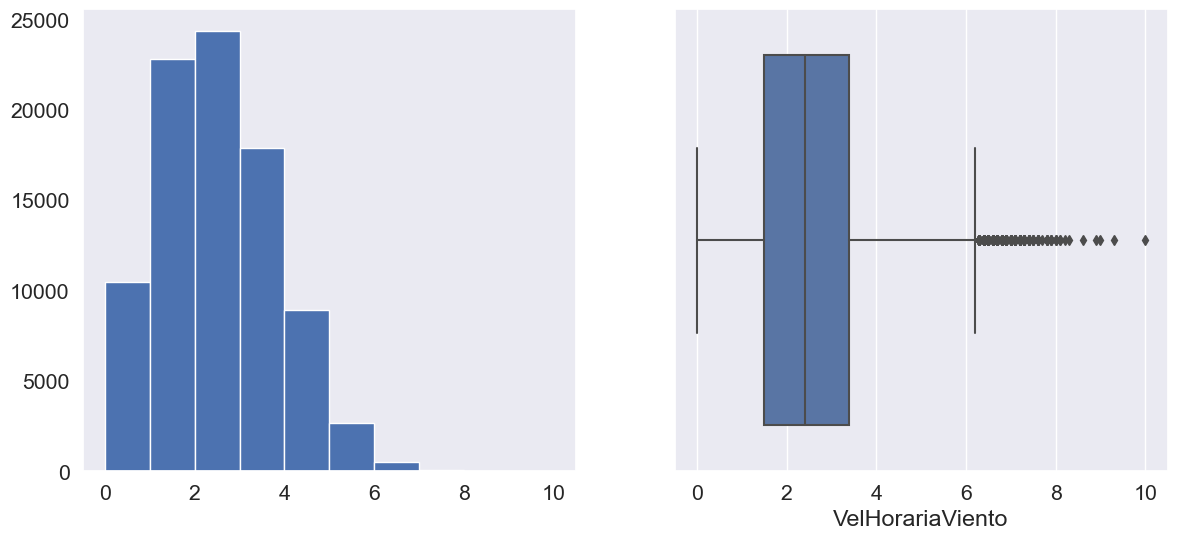

In [19]:
# Variable dependiente
sns.set(font_scale=1.4)
col = 'VelHorariaViento'
print('Column: ', col)
print('Skew:', round(viento_df[col].skew(), 2))
print('Kurtosis: ', round(viento_df[col].kurtosis(), 2))
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
viento_df[col].hist(grid=False)
plt.subplot(1, 2, 2)
sns.boxplot(x=viento_df[col])
plt.show()

Nuestra variable de interes, Velocidad horaria del viento (m/s), cuenta con datos sesgados ligeramente hacia la izquierda, indicando una concentración en valores por debajo de los 4 m/s. Se puede observar en el boxplot, que se tienen algunas velocidad que superan los 6 m/s, y que al aprecer estos valores se podrian considerar atipicos. Se debe detallar mas en el momentos y las condiciones de medición de esos registros para verificar si realmente son atipicos. 

* **Variables independientes**

In [20]:
# remover variable dependiente de la lista
num_cols.remove('VelHorariaViento')

Column:  DirVientoHoraria
Skew: -0.86
Kurtosis:  -0.82


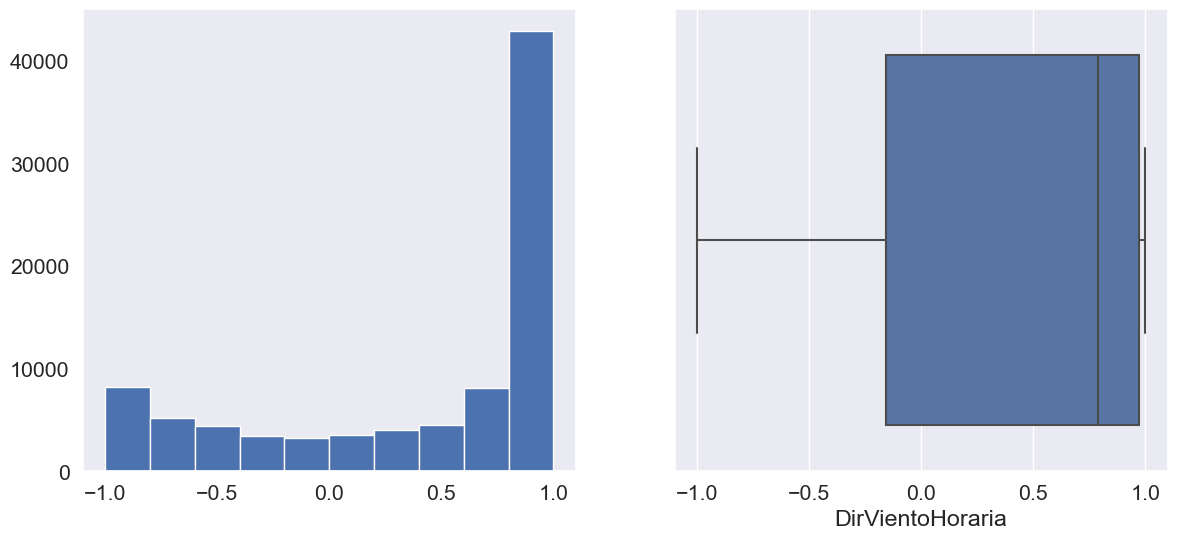

Column:  HumRelMaxHAnt
Skew: -0.48
Kurtosis:  -0.78


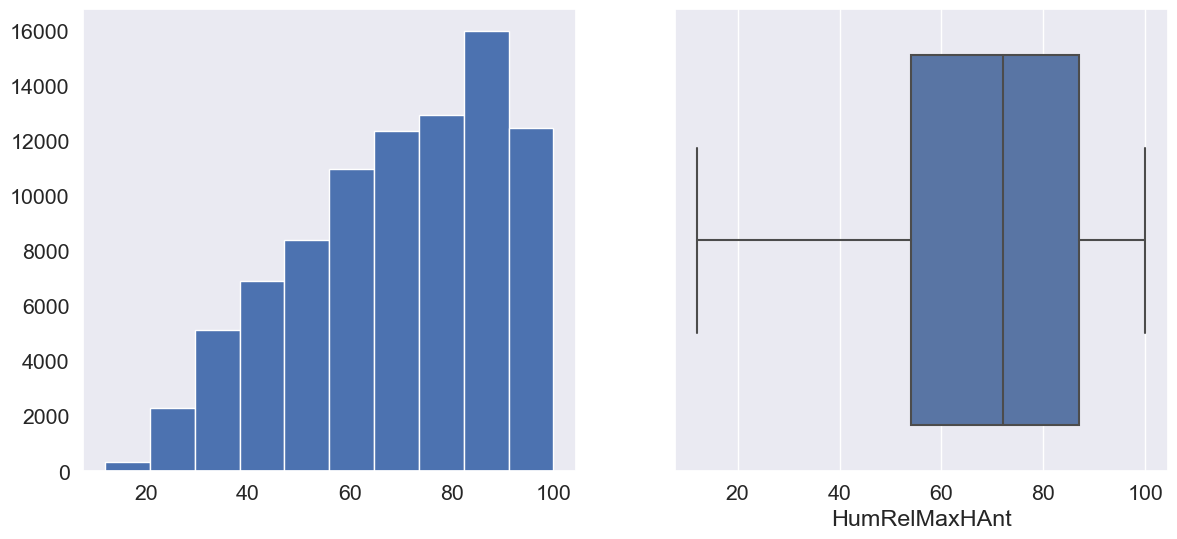

Column:  HumRelMinHAnt
Skew: -0.23
Kurtosis:  -0.96


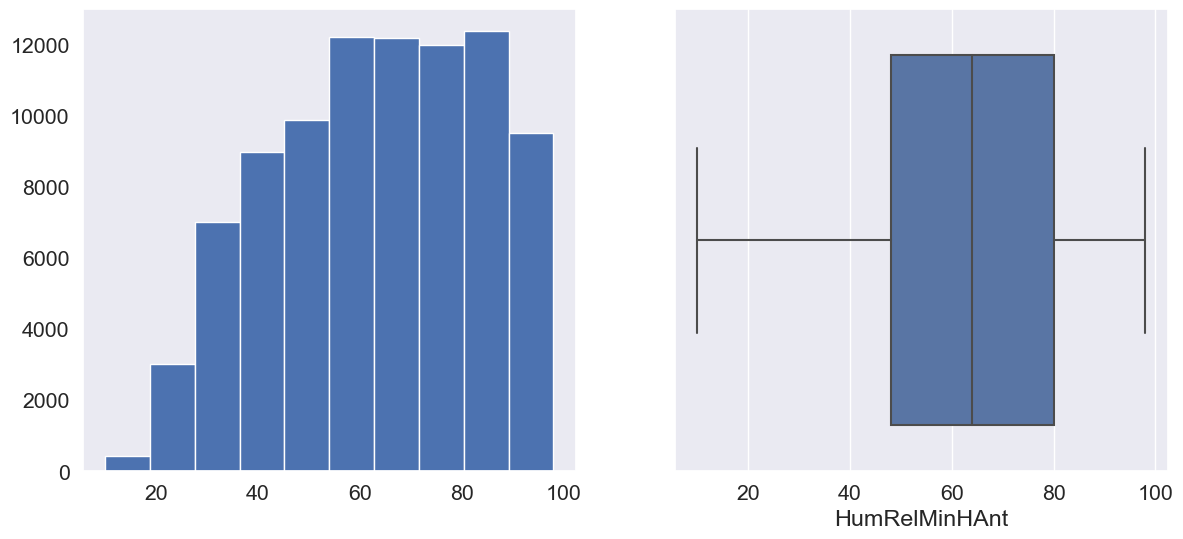

Column:  TempMaxHAnt
Skew: 0.26
Kurtosis:  -0.42


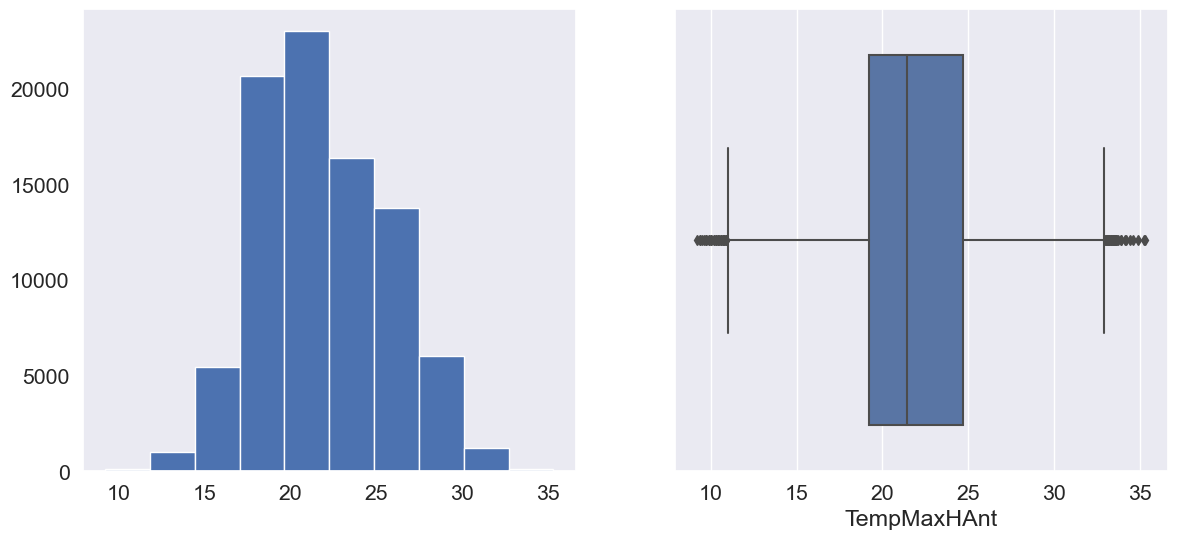

Column:  TempMinHAnt
Skew: 0.24
Kurtosis:  -0.12


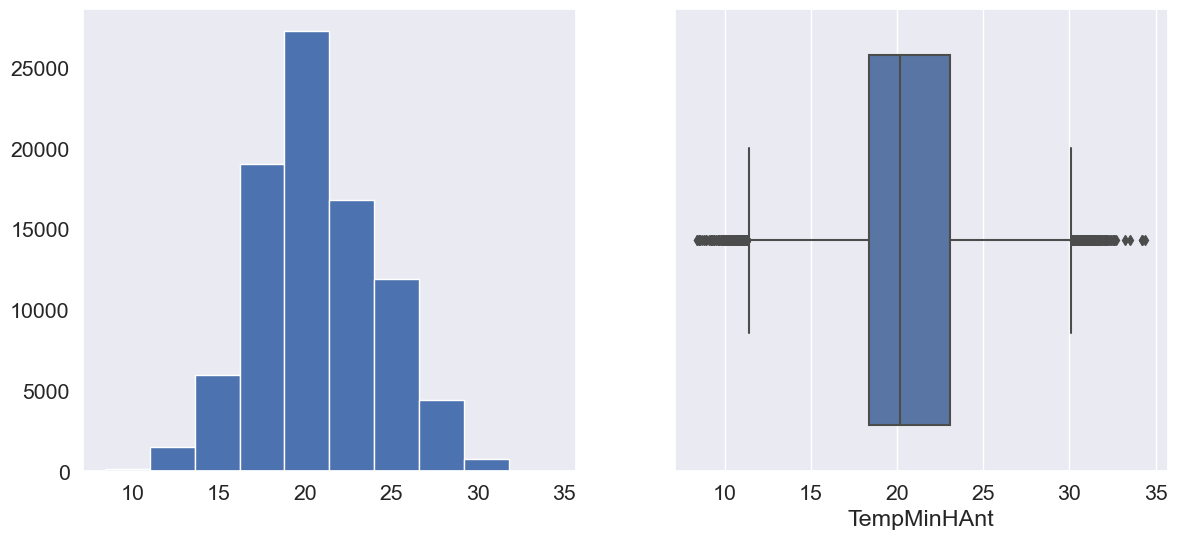

Column:  HumRelHoraria
Skew: -0.35
Kurtosis:  -0.89


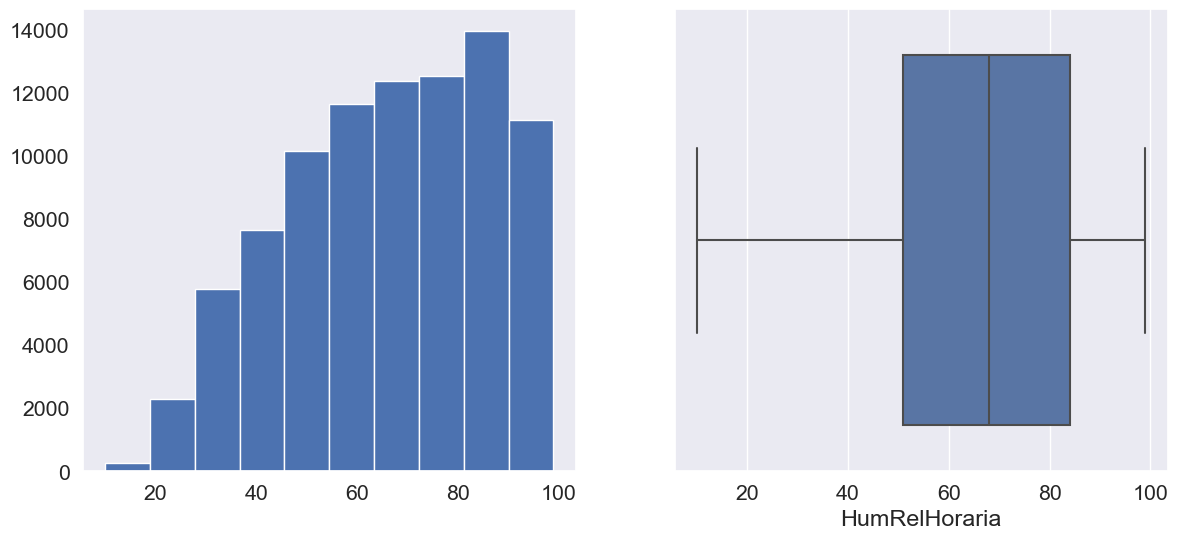

Column:  PresionAtmNivEstHor
Skew: 6.18
Kurtosis:  179.64


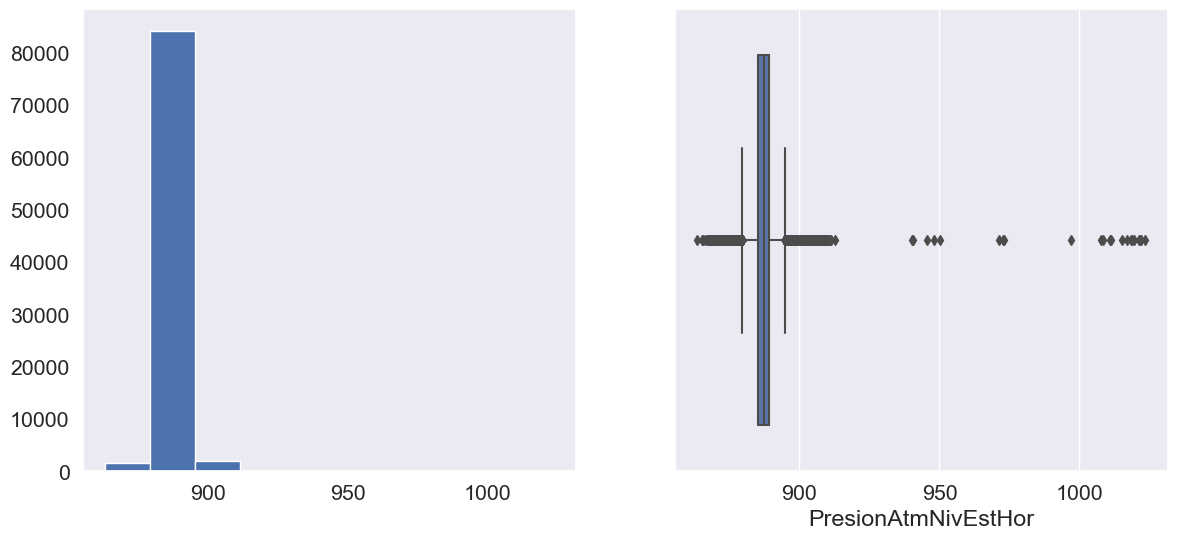

Column:  PreciTotalHr
Skew: 17.65
Kurtosis:  476.4


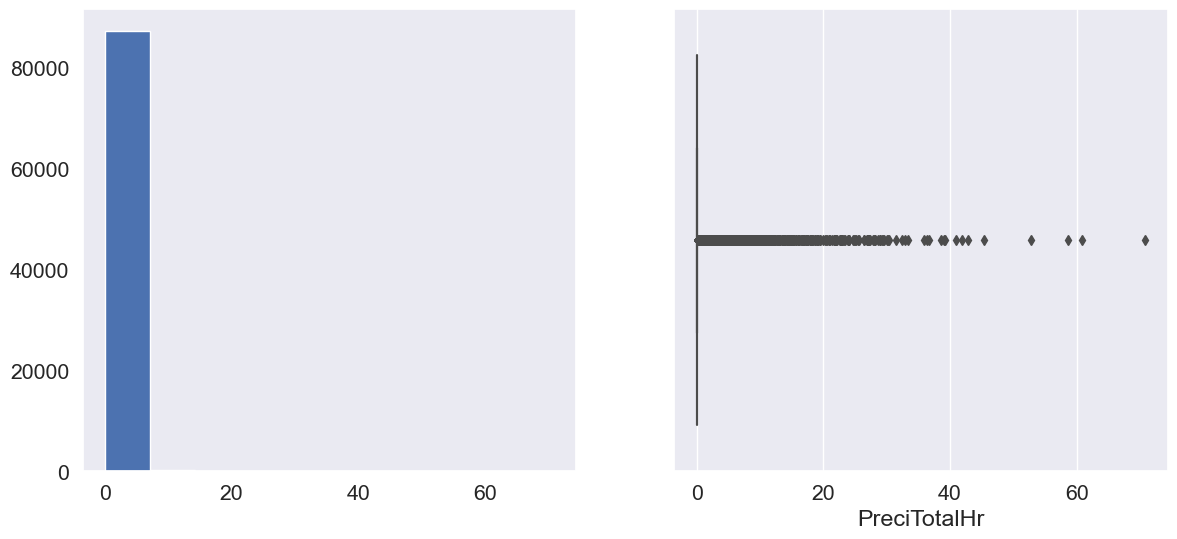

Column:  MaxRafagaViento
Skew: 0.41
Kurtosis:  0.11


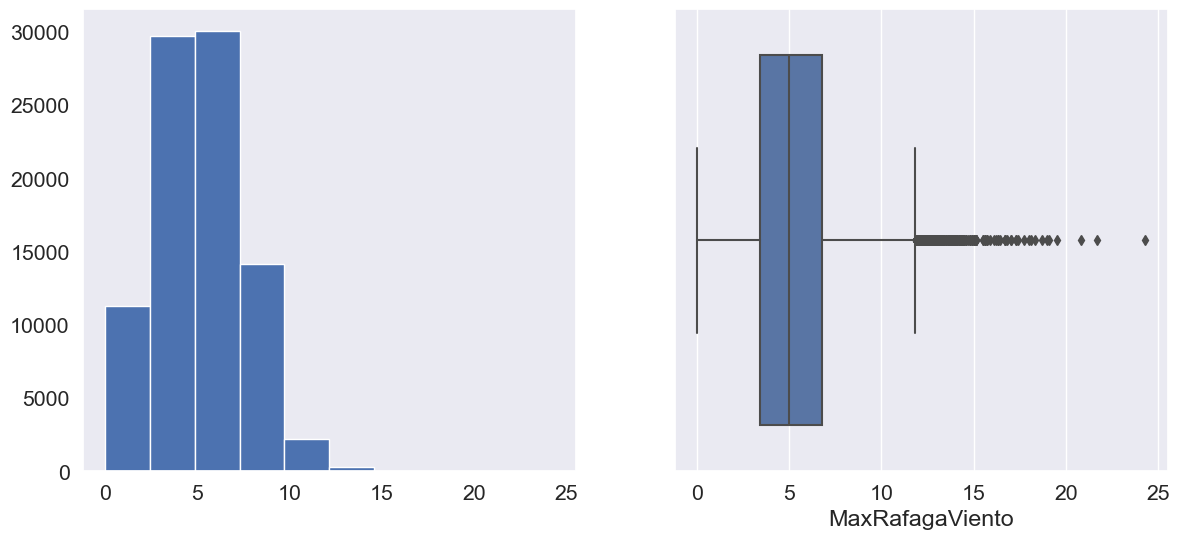

Column:  PreAtmMaxHAnt
Skew: 1.02
Kurtosis:  5.82


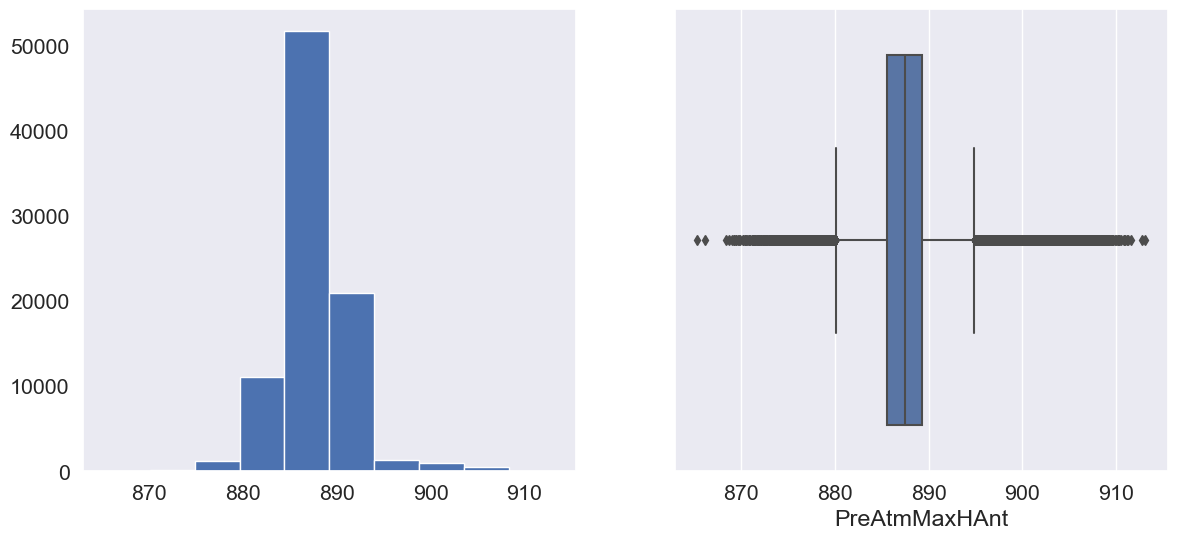

Column:  PreAtmMinHAnt
Skew: 0.33
Kurtosis:  4.91


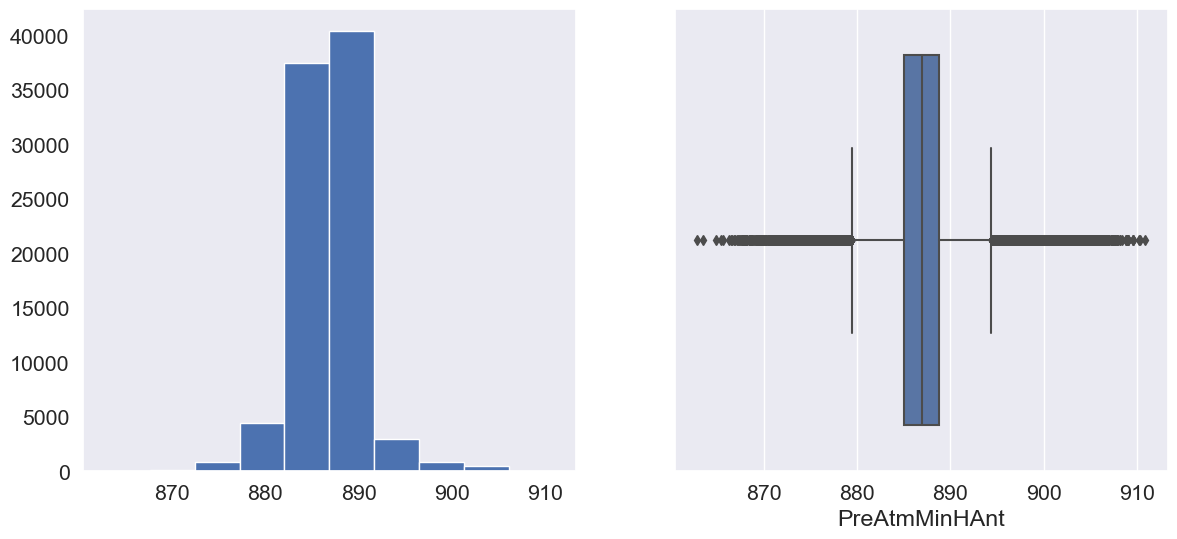

In [21]:
sns.set(font_scale=1.4)
for col in num_cols:
    print('Column: ', col)
    print('Skew:', round(viento_df[col].skew(), 2))
    print('Kurtosis: ', round(viento_df[col].kurtosis(), 2))
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    viento_df[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=viento_df[col])
    plt.show()

Se destacan del análisis las siguientes variables:
* **DirVientoHoraria**: Las medidades de dirección del viento se encuentran sesgadas hacia la derecha, es decir, hacia valores cercanos a 1. No se tienen valores atípicos para esta medida. 
* **HumRelMaxHAnt**: Para el porcentaje de humedad relativa máxima de la hora anterior, se tiene un sesgo hacia la derecha, por lo que se concentra hacia porcentajes altos de humedad, y no se tienen atípicos para esta medida.
* **HumRelMinHAnt**: Similar a la variable HumRelMaxHAnt, se concentra en procentajes altos de humedad, y no se tienen valores atípicos.
* **TempMaxHAnt**: Los valores de temperatura rondan en su mayoria alrededor de los 20°C, con un sesgo a la izquierda, con aparentemente pocos atípicos.
* **TempMinHAn**: Similar a la varible TempMaxHAnt, se concentra alrededor de los 20°C.
* **HumRelHoraria**: Para el procentaje de humedad relativa horaria, se tiene un sesgo hacia la derecha, concentrandose en porcentajes altos de humedad, y sin datos atípicos entre las mediciones de humedad.
* **PresionAtmNivEstHor**: Los valores de Presión Atmosferica a nivel de estación, horaria se encuentran muy concetrados alrededor de 880 mB, la distribución se encuentra sesgada a la derecha, y tiene una alta presencia de valores atípicos.
* **PreciTotalHr**: Los valores de Precipitación total por hora en su mayoria toman el valor de 0, por lo que la distribución de los datos esta sesgada a la izquierda, la distribución tiene sesgo positivo, y con una alta presencia de valores atípicos.
* **MaxRafagaViento**: Para la variable de máxima ráfaga de viento m/s, se tiene un sesgo positivo en la distribución, con valores que se concentran por debajo de los 12 m/s, con algunos valores atípicos, superiores a este valor.
* **PreAtmMaxHAnt**: Los registros de presión atmosférica máxima se encuentran ligeramente sesgados a la izquierda, y hay presencia de valores atípicos, con alta dispersión de los datos.
* **PreAtmMinHAnt**: Los registros de presión atmosférica minima se encuentran ligeramente sesgados a la izquierda, y hay presencia de valores atípicos, con alta dispersión de los datos.

Ahora se observa la unica variable no númerica del dataset 'HORA (UTC)'. Se transforma la variable en tipo 'datetime' para mejorar su visualización.

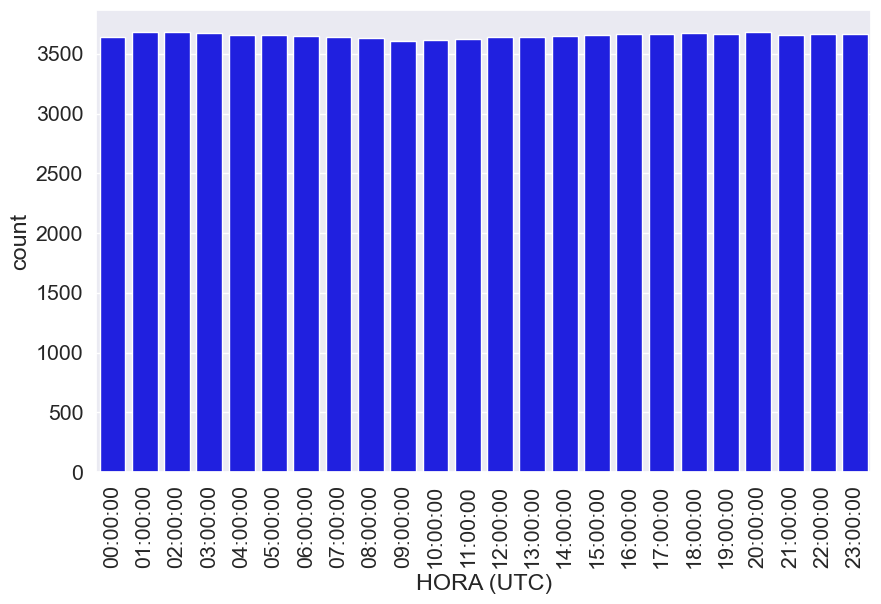

In [22]:
# Variable "categorica"
# sns.countplot(x = 'HORA (UTC)', data = viento_df, color = 'blue', order = viento_df['HORA (UTC)'].value_counts().index);
# plt.xticks(rotation=90)
viento_df['HORA (UTC)'] = pd.to_datetime(viento_df['HORA (UTC)'] , format='%H:%M').dt.time

# Ordena el DataFrame por la columna 'Hora'
viento_df = viento_df.sort_values(by='HORA (UTC)')

plt.figure(figsize=(10, 6))
sns.countplot(x='HORA (UTC)', data=viento_df, color='blue')
plt.xticks(rotation=90)
plt.show()

Se puede observar que para este caso se tiene una cantidad balanceada de datos para cada hora, lo que se asemeja a una distribución uniforme (aunque la variable no es númerica). 

### Análisis Bivariado

En esta sección se realizará el análisis bivariado entre las variables, para identicar relaciones entre las variables explicativas y con respecto a la variable dependiente.

Primero se realizan gráficos de dispersión entre la variable dependiente y cada una de las variables explicativas.

In [23]:
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1]);
    fig.suptitle('Relación entre %s y VelHorariaViento'%col)

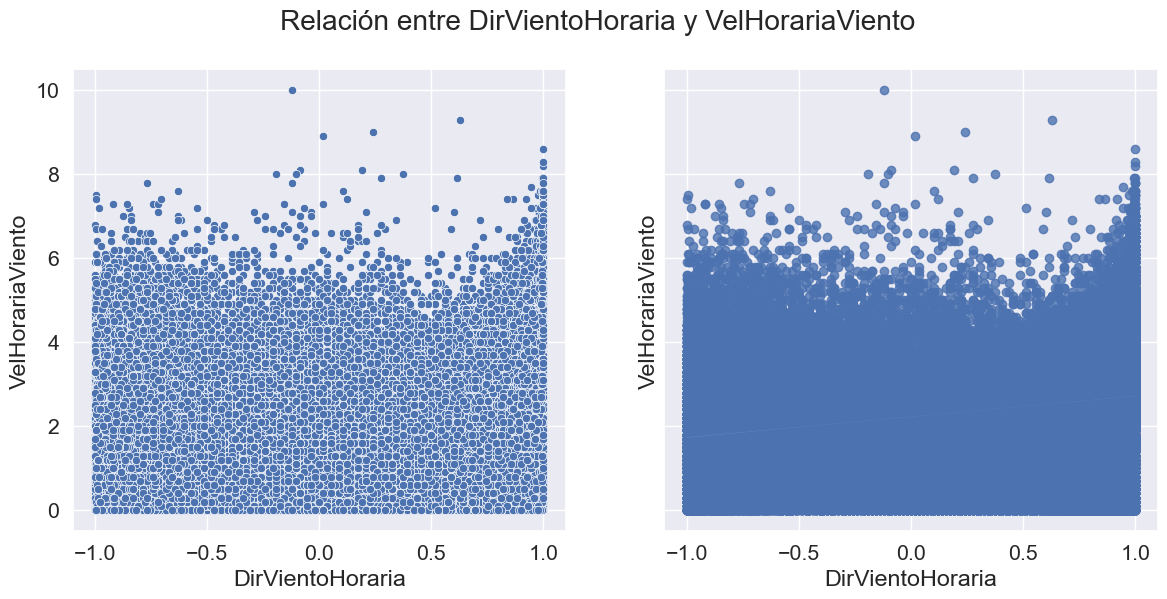

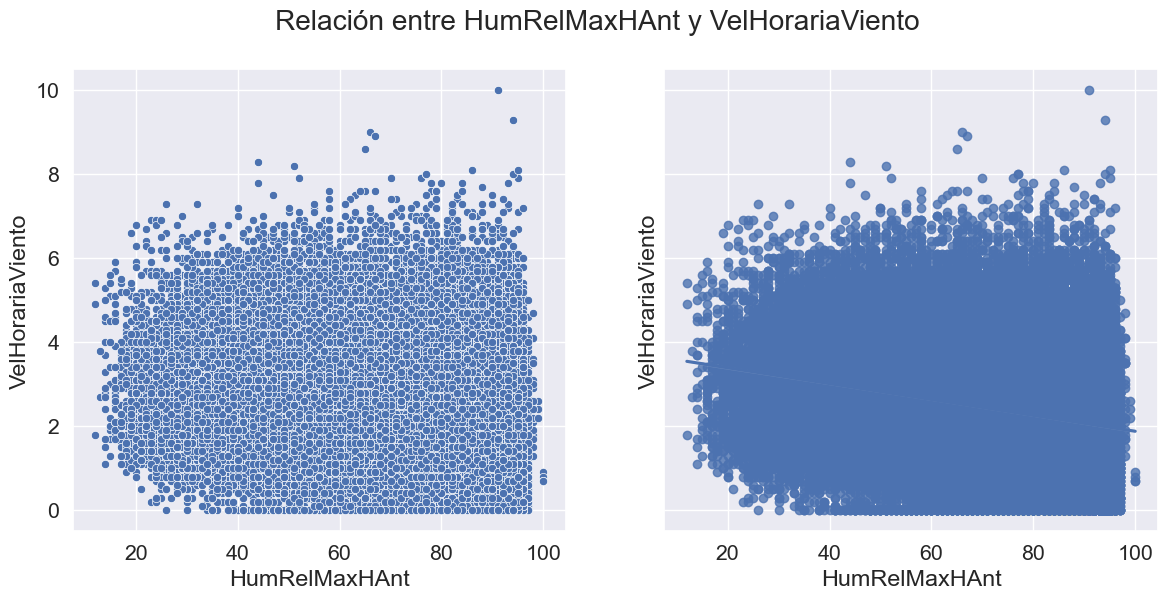

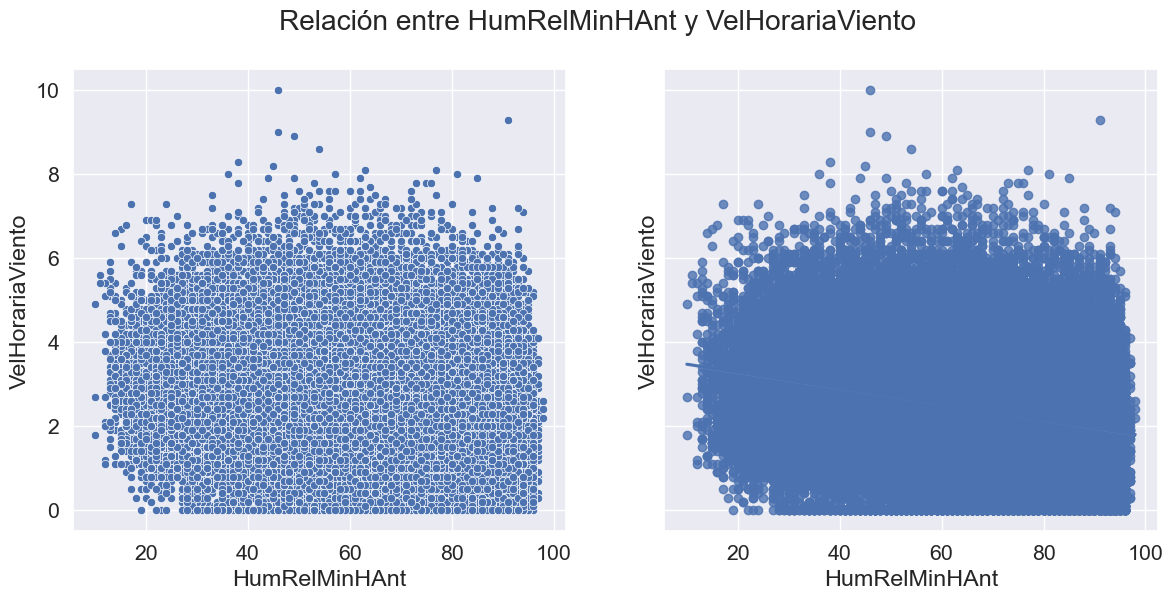

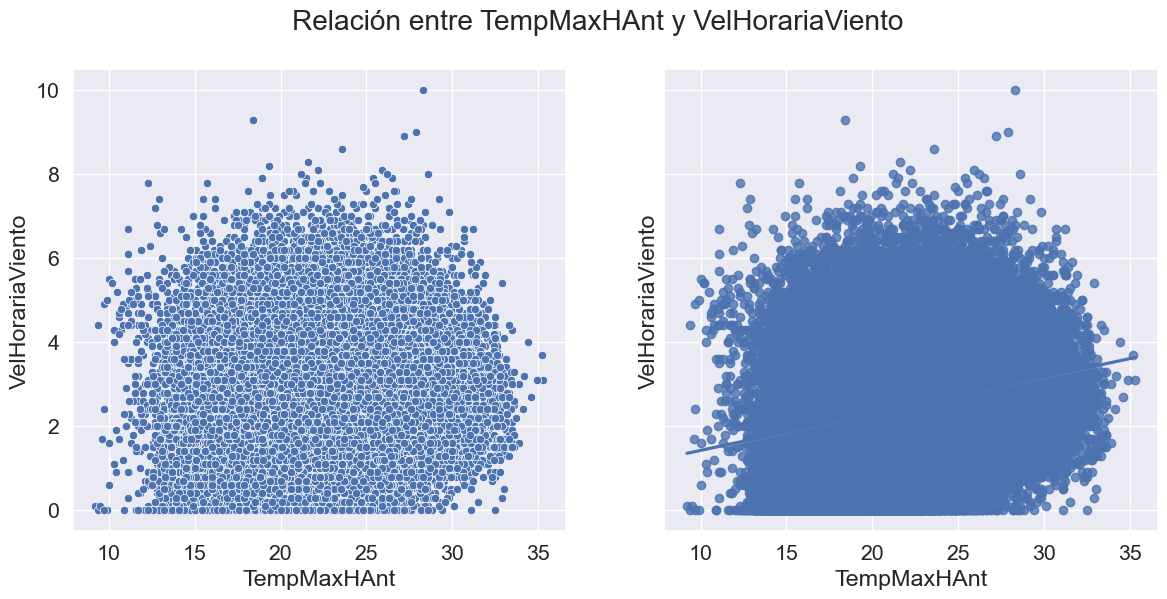

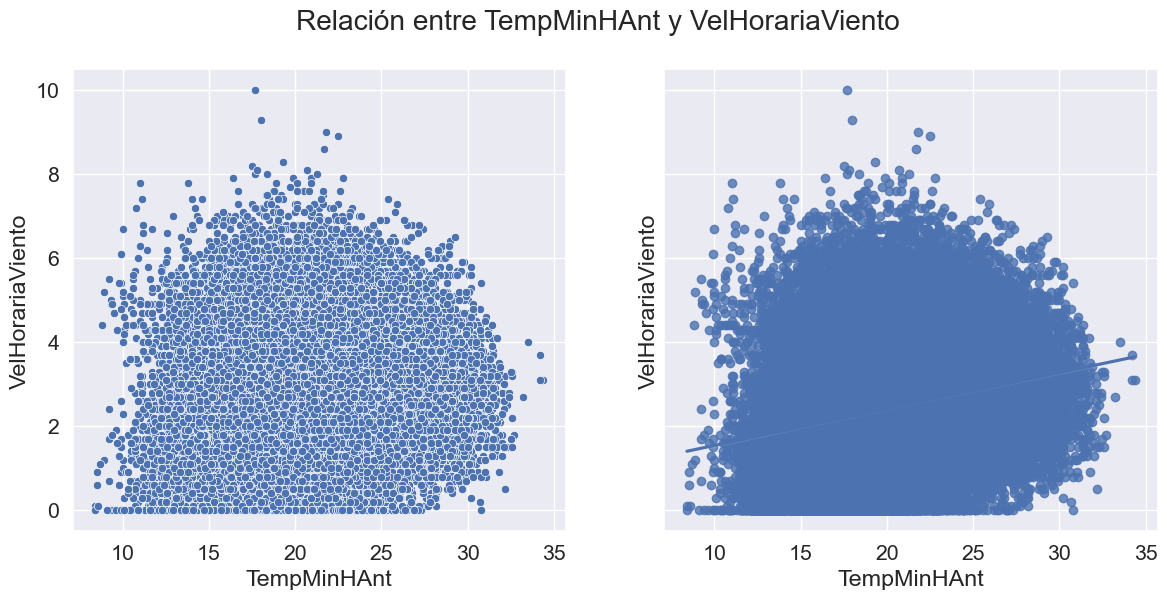

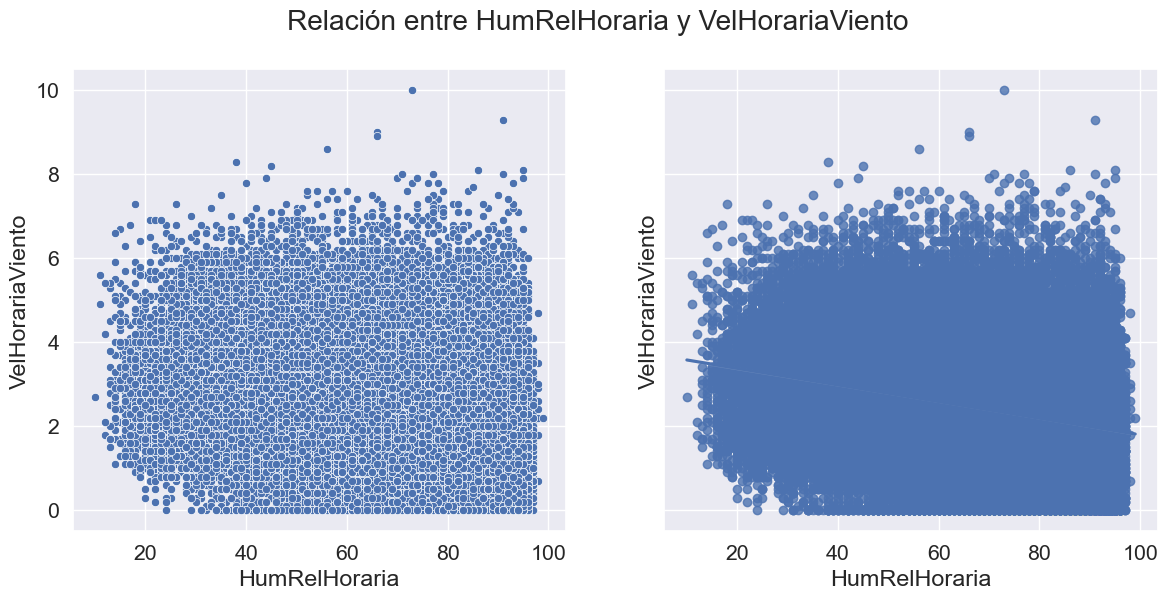

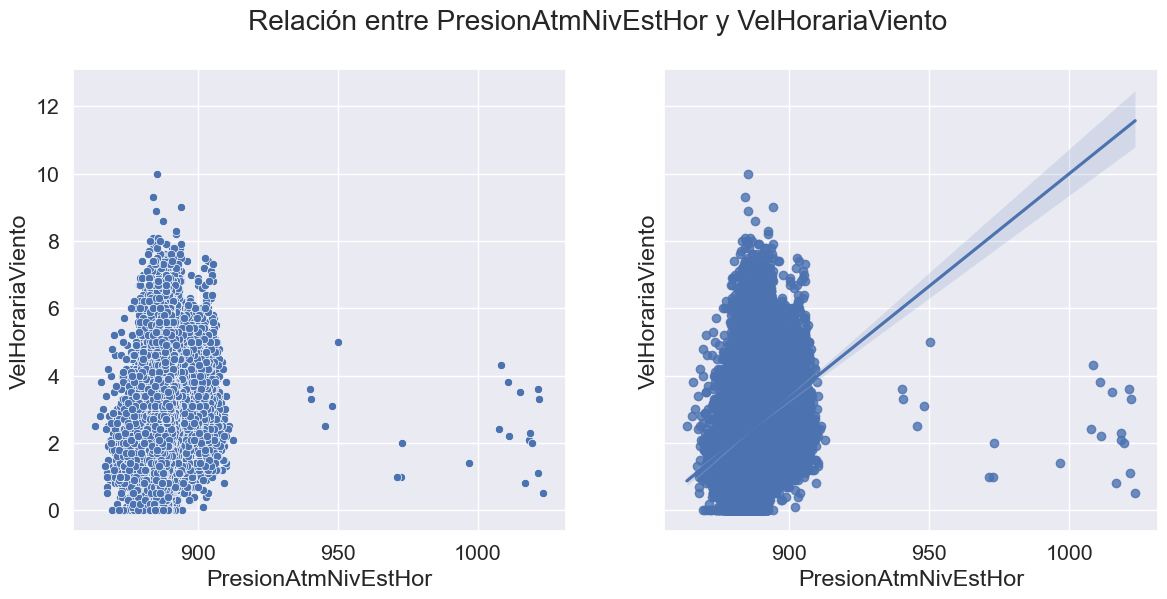

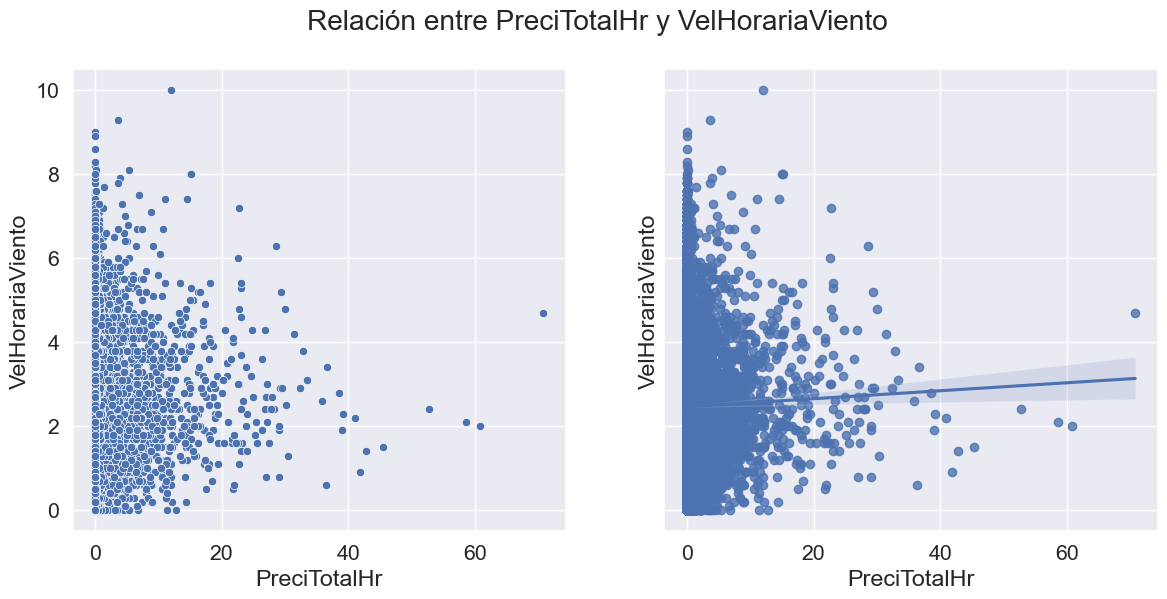

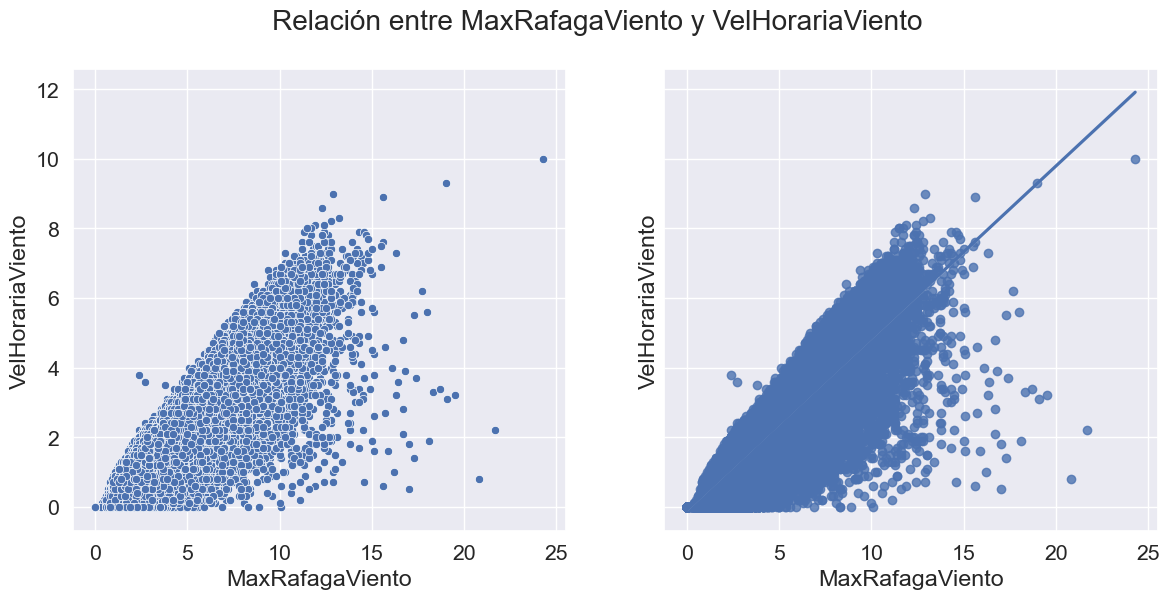

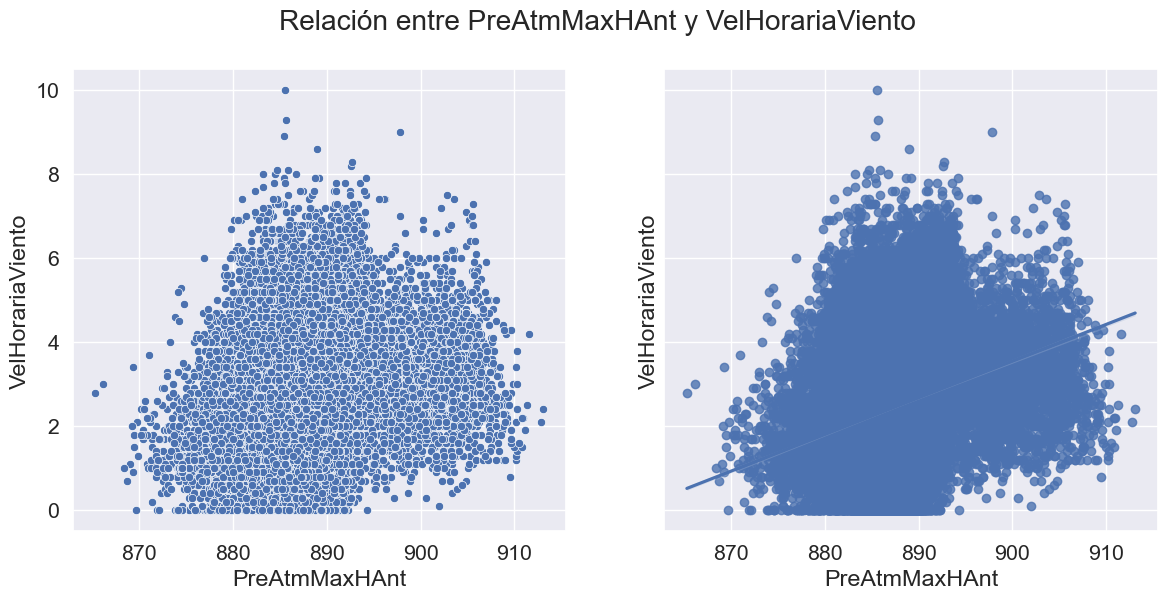

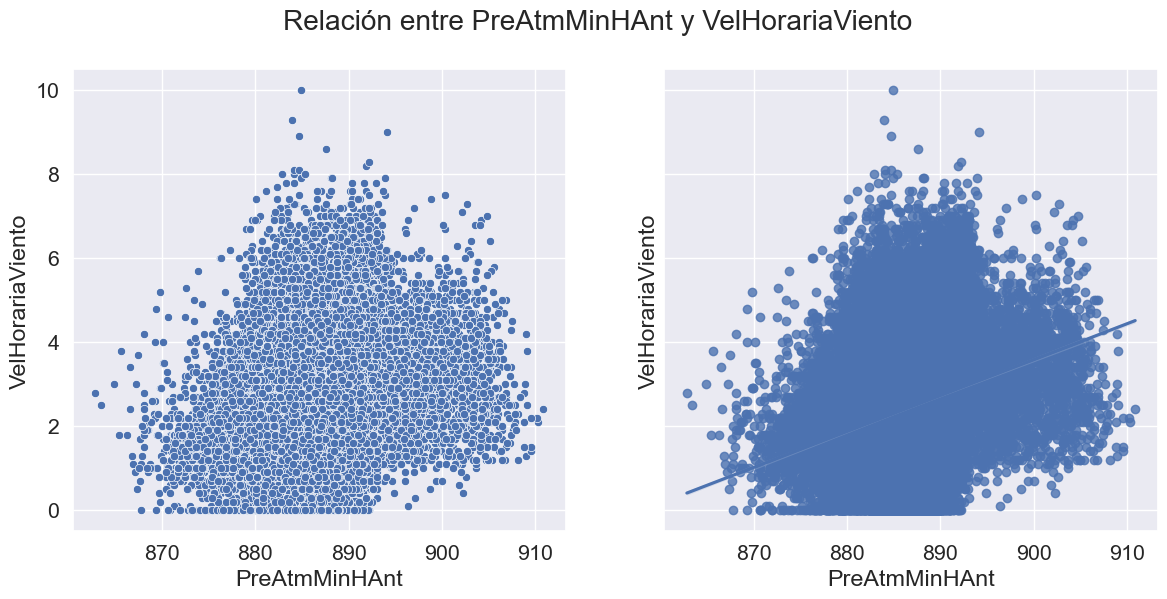

In [24]:
for col in num_cols:
    scatter_regplot(viento_df, col, 'VelHorariaViento')

Se puede observar rapidamente, que existe un gran dispersión en los datos al analizar la relación entre las variables explicativas y la variable dependiente. Para la mayoria de variables, como DirVientoHoraria, HumRelHoraria, TempMaxHAnt, entre otras, no se observa un patrón relación lineal frente a la variable respuesta o algún otro patrón. Para el caso de la varaible MaxRafagaViento, si se observa una relación lineal con respecto a la variable respuesta. Por otro lado, al observar el gráfico entre la velocidad del viento y la Presion Atmosfericaa nivel de estación, se puede ver una aparente relación lineal entre las varaibles, pero la presencia de valores atipicos hacen que la linea de tendencia se trace de manera equivocada. 

### Análisis de Multicolinealidad


Ahora se realizará el análisis de correlación entre las variables, y así determinar si existe multicolinealidad entre las variables explicativas.

In [25]:
matplotlib.rc_file_defaults()

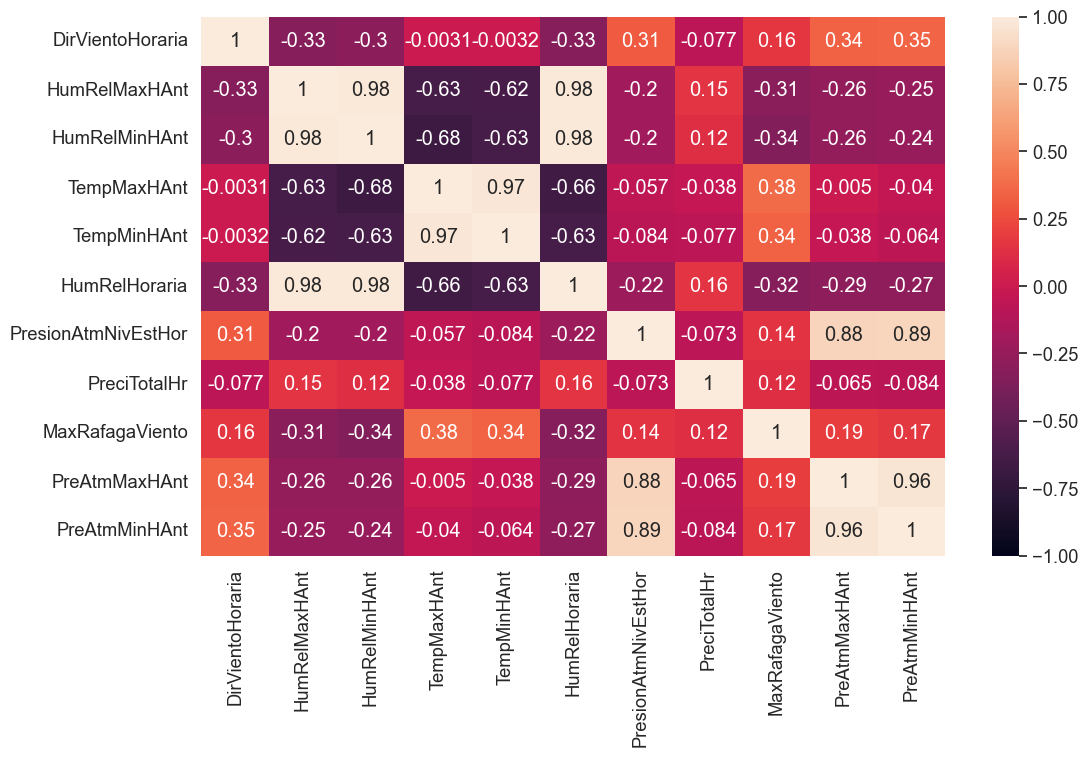

In [26]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 7))
sns.heatmap(viento_df.drop(['HORA (UTC)',  'VelHorariaViento'],axis=1).corr(), annot = True, vmin = -1, vmax = 1);

Se puede observar en el gráfico de correlación, que existe una correlación fuerte entre varias variables, como por ejemplo entre los porcentajes de humedad, las medidas de temperatura o las medidas de presión atmosferica. Por lo que se podria considerar retirar del análisis algunas de estas variables para evitar problemas de multicolinealidad. 

### Reducción de dimensionalidad

Se calcula a cotinuación el VIF (Variance Inflation Factor) para reducir la dimensionalidad del dataset y evitar el problema de multicolinealidad.

* Iteración 1:

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

drop_list = ['HORA (UTC)',  'VelHorariaViento']
VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(drop_list,axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(drop_list,axis=1).values, i) for i in range(viento_df.drop(drop_list,axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.714903
1,HumRelMaxHAnt,1035.490461
2,HumRelMinHAnt,868.669868
3,TempMaxHAnt,2431.219027
4,TempMinHAnt,2035.022178
5,HumRelHoraria,593.271593
6,PresionAtmNivEstHor,239633.065205
7,PreciTotalHr,1.137503
8,MaxRafagaViento,7.476801
9,PreAtmMaxHAnt,944178.864436


Para esta primera iteración, hay muchas variables con un VIF alto. De momento se retira del análisis la variable **PreAtmMinHAnt** la cual tiene el VIF mas alto.

* Iteración 2:

In [38]:
drop_list.append('PreAtmMinHAnt')
VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(drop_list,axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(drop_list,axis=1).values, i) for i in range(viento_df.drop(drop_list,axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.714871
1,HumRelMaxHAnt,1035.462996
2,HumRelMinHAnt,867.967302
3,TempMaxHAnt,2404.425769
4,TempMinHAnt,2014.437408
5,HumRelHoraria,592.937159
6,PresionAtmNivEstHor,221749.833219
7,PreciTotalHr,1.136481
8,MaxRafagaViento,7.470095
9,PreAtmMaxHAnt,222364.729876


En esta iteración todavia se tiene alta multicolinealidad entre los datos, por lo que se deben seguir retirando variables del análisis. En esta ocasión se retira del análisis la variable **PreAtmMaxHAnt**.

* Iteración 3:

In [39]:
drop_list.append('PreAtmMaxHAnt')
VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(drop_list,axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(drop_list,axis=1).values, i) for i in range(viento_df.drop(drop_list,axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.714757
1,HumRelMaxHAnt,1035.459978
2,HumRelMinHAnt,867.889773
3,TempMaxHAnt,2402.391832
4,TempMinHAnt,2013.973594
5,HumRelHoraria,592.852893
6,PresionAtmNivEstHor,163.569036
7,PreciTotalHr,1.135742
8,MaxRafagaViento,7.466803


Se va retirar la variable **TempMaxHAnt** del análisis, ya que tiene el VIF mas alto en esta iteración.

* Iteración 4:

In [40]:
drop_list.append('TempMaxHAnt')
VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(drop_list,axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(drop_list,axis=1).values, i) for i in range(viento_df.drop(drop_list,axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.698935
1,HumRelMaxHAnt,471.556809
2,HumRelMinHAnt,376.966434
3,TempMinHAnt,65.635100
4,HumRelHoraria,589.189047
5,PresionAtmNivEstHor,141.116798
6,PreciTotalHr,1.112773
7,MaxRafagaViento,7.412661


Ahora se retira del análisis la varible **HumRelMaxHAnt**.

* Iteración 5:

In [41]:
drop_list.append('HumRelMaxHAnt')
VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(drop_list,axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(drop_list,axis=1).values, i) for i in range(viento_df.drop(drop_list,axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.688157
1,HumRelMinHAnt,344.135629
2,TempMinHAnt,65.562660
3,HumRelHoraria,387.469757
4,PresionAtmNivEstHor,137.506980
5,PreciTotalHr,1.112166
6,MaxRafagaViento,7.338349


Todavia se tienen VIF superiores a 5, por lo que se retirará la variable **HumRelHoraria** del análisis.

* Iteración 6:

In [42]:
drop_list.append('HumRelHoraria')
VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(drop_list,axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(drop_list,axis=1).values, i) for i in range(viento_df.drop(drop_list,axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.634581
1,HumRelMinHAnt,21.277076
2,TempMinHAnt,65.182177
3,PresionAtmNivEstHor,131.955618
4,PreciTotalHr,1.068909
5,MaxRafagaViento,7.332658


La siguiente variable a ser retirada es **PresionAtmNivEstHor**.

* Iteración 7:

In [43]:
drop_list.append('PresionAtmNivEstHor')
VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(drop_list,axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(drop_list,axis=1).values, i) for i in range(viento_df.drop(drop_list,axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.408214
1,HumRelMinHAnt,5.851698
2,TempMinHAnt,12.640946
3,PreciTotalHr,1.068262
4,MaxRafagaViento,7.242287


Ya se tienen valores de VIF relativamente bajos, pero todavia superan algunos el valor de 5. Se retira ahora la variable **TempMinHAnt**.

* Iteración 8:

In [44]:
drop_list.append('TempMinHAnt')
VIF = pd.DataFrame()
VIF['feature'] = viento_df.drop(drop_list,axis=1).columns
VIF['VIF'] = [variance_inflation_factor(viento_df.drop(drop_list,axis=1).values, i) for i in range(viento_df.drop(drop_list,axis=1).shape[1])]
# take a look
VIF

,feature,VIF
0,DirVientoHoraria,1.389529
1,HumRelMinHAnt,3.184922
2,PreciTotalHr,1.039001
3,MaxRafagaViento,3.678934


Finalmente, en la iteración número 8, se obtienen solo 4 variables: **DirVientoHoraria**, **HumRelMinHAnt**, **PreciTotalHr** y **MaxRafagaViento**. Estas variables, nos permiten obtener un VIF menor a 5. Estas serian las variables explicativas a utilizar en un problema de regresión, si se quiere evitar tener multicolinealidad en los datos.